In [22]:
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
df_reviews  = pd.read_csv("reviews.csv")

In [24]:
def plot_categorical_column(df, column_name):

  value_counts = df[column_name].value_counts()
  plt.figure(figsize=(8,6))
  value_counts.plot(kind="bar",color="skyblue",edgecolor="black")
  plt.title(f"Distribución de {column_name}", fontsize=14)
  plt.xlabel(column_name, fontsize=12)
  plt.xticks(rotation=45, fontsize=10)
  plt.grid(axis="y",linestyle="--",alpha=0.7)
  plt.show()

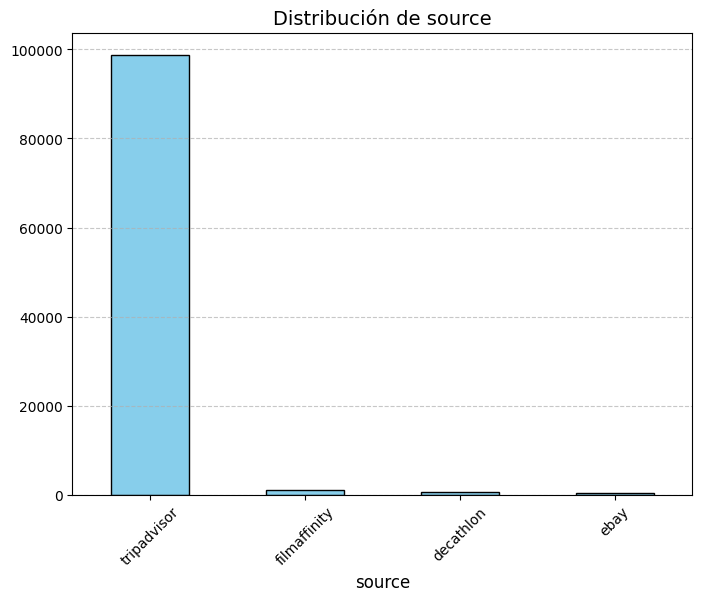

In [25]:
plot_categorical_column(df_reviews,"source")

In [26]:
EXAMPLE = """¡Hola, Mundo!
¿Qué tal?"""

In [27]:
%pip install Unidecode

Note: you may need to restart the kernel to use updated packages.


In [28]:
from unidecode import unidecode

In [29]:
def remove_accents(text):
  if isinstance(text, str):
    return unidecode(text)

In [30]:
import re

In [31]:
def process_text(text):
  text = text.lower()
  text = re.sub(r'[^\w\s]','',text)
  text = re.sub(r'\n',' ',text)
  return text